# Evaluation of different AI Classificaion models

## Importing Necessary Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
#from pandas_profiling import ProfileReport
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor,     GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, r2_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

crop_filepath = "./data/new1.csv"
data = pd.read_csv(crop_filepath)

data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [2]:
data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
3365,26,30,37,29.269634,78.090486,6.788355,20.356465,cowpea
3366,32,20,44,27.774028,74.139967,6.378500,22.481851,cowpea
3367,38,33,36,31.250179,78.254701,6.309139,27.234903,cowpea
3368,37,29,36,34.392299,75.321708,6.267670,28.696324,cowpea
3369,21,20,55,27.184462,71.447573,6.920836,21.013610,cowpea


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3370 entries, 0 to 3369
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            3370 non-null   int64  
 1   P            3370 non-null   int64  
 2   K            3370 non-null   int64  
 3   temperature  3370 non-null   float64
 4   humidity     3370 non-null   float64
 5   ph           3370 non-null   float64
 6   rainfall     3370 non-null   float64
 7   label        3370 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 210.8+ KB


In [4]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,3370.000000,3370.000000,3370.000000,3370.000000,3370.000000,3370.000000,3370.000000
mean,60.740950,51.456677,61.673294,26.222423,71.731487,6.392270,88.891031
std,40.074303,30.244252,59.369866,4.828002,18.928921,0.708744,50.052614
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.118908
25%,27.000000,29.000000,23.000000,23.249019,63.006649,5.997230,54.531824
50%,60.000000,48.000000,40.000000,26.066725,75.942593,6.356620,73.959546
75%,89.000000,65.000000,60.000000,29.142311,85.405641,6.784619,108.355890
max,200.000000,145.000000,249.000000,43.675493,99.981876,9.935091,298.560117


In [5]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
data.nunique()

N               186
P               141
K               220
temperature    3370
humidity       3370
ph             3370
rainfall       3370
label            35
dtype: int64

In [7]:
data.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\victo\AppData\Local\Temp\ipykernel_17736\2586060177.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<AxesSubplot: title={'center': 'Correlation between features'}>

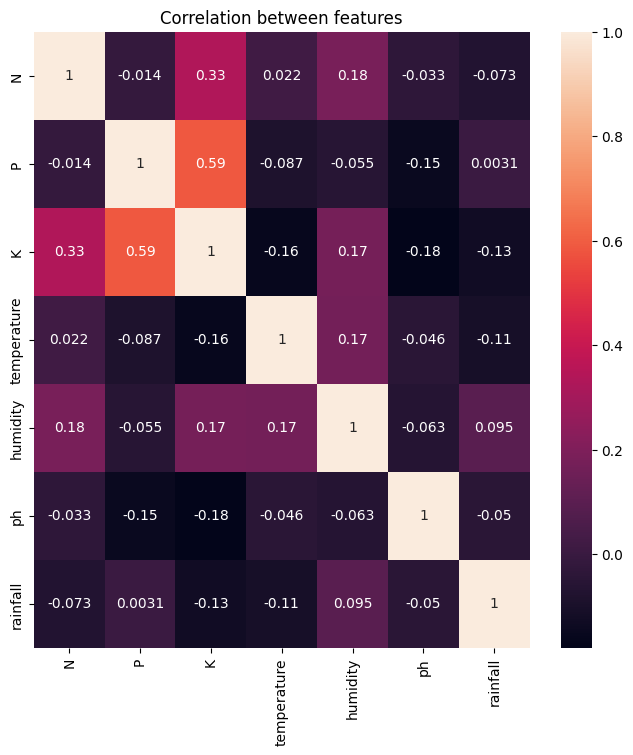

In [8]:
plt.figure(figsize=(8,8))
plt.title("Correlation between features")
corr = data.corr()
sns.heatmap(corr, annot=True)

Text(0, 0.5, 'crops')

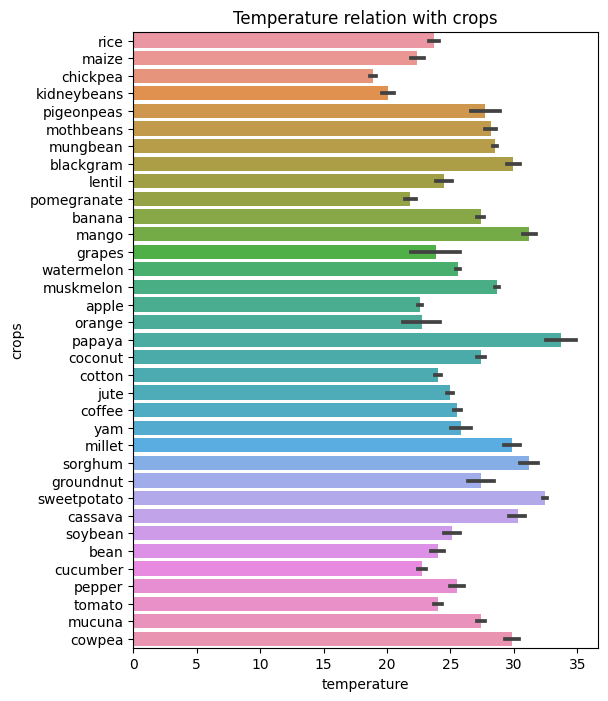

In [9]:
plt.figure(figsize=(6,8))
plt.title("Temperature relation with crops")
sns.barplot(y="label", x="temperature", data=data)
plt.ylabel("crops")

In [10]:
encoder = LabelEncoder()
data.label = encoder.fit_transform(data.label)

In [11]:
features = data.drop("label", axis=1)
target = data.label

In [12]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42)

In [13]:
lr = LinearRegression().fit(X_train, y_train)
lr_pred= lr.score(X_test, y_test)

print("Training score: {:.3f}".format(lr.score(X_train, y_train)))
print("Test score: {:.3f}".format(lr.score(X_test, y_test)))

Training score: 0.144
Test score: 0.134


In [14]:
tree = DecisionTreeClassifier(max_depth=15,random_state=0).fit(X_train, y_train)
tree_pred= tree.score(X_test, y_test)

print("Training score: {:.3f}".format(tree.score(X_train, y_train)))
print("Test score: {:.3f}".format(tree.score(X_test, y_test)))

Training score: 0.996
Test score: 0.977


In [15]:
rf = RandomForestClassifier(n_estimators=10, max_features=3, random_state=0).fit(X_train, y_train)
rf_pred= rf.score(X_test, y_test)

print("Training score: {:.3f}".format(rf.score(X_train, y_train)))
print("Test score: {:.3f}".format(rf.score(X_test, y_test)))

Training score: 1.000
Test score: 0.981


In [16]:
gbr = GradientBoostingClassifier(n_estimators=20, max_depth=4, max_features=2, random_state=0).fit(X_train, y_train)
gbr_pred= gbr.score(X_test, y_test)

print("Training score: {:.3f}".format(gbr.score(X_train, y_train)))
print("Test score: {:.3f}".format(gbr.score(X_test, y_test)))

Training score: 0.998
Test score: 0.975


In [17]:
svm = SVC(C=100, gamma=0.001).fit(X_train, y_train)
svm_pred= svm.score(X_test, y_test)

print("Training score: {:.3f}".format(svm.score(X_train, y_train)))
print("Test score: {:.3f}".format(svm.score(X_test, y_test)))

Training score: 0.997
Test score: 0.973


In [18]:
log_reg = LogisticRegression(C=0.1, max_iter=100000000).fit(X_train, y_train)
log_reg_pred= log_reg.score(X_test, y_test)

print("Training score: {:.3f}".format(log_reg.score(X_train, y_train)))
print("Test score: {:.3f}".format(log_reg.score(X_test, y_test)))

Training score: 0.985
Test score: 0.970


c:\Users\victo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
